In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np


<h2>Load and Clean Data with Pandas<h2/>

In [3]:
df=pd.read_csv("E:ds/DATA/laptopData.csv")

In [4]:
df

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1273 non-null   float64
 1   Company           1273 non-null   object 
 2   TypeName          1273 non-null   object 
 3   Inches            1273 non-null   object 
 4   ScreenResolution  1273 non-null   object 
 5   Cpu               1273 non-null   object 
 6   Ram               1273 non-null   object 
 7   Memory            1273 non-null   object 
 8   Gpu               1273 non-null   object 
 9   OpSys             1273 non-null   object 
 10  Weight            1273 non-null   object 
 11  Price             1273 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB
None


In [23]:
print(df.head())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.3                            1440x900   
2      HP   Notebook    15.6                   Full HD 1920x1080   
3   Apple  Ultrabook    15.4  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight        Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg   71378.6832  
1        Intel HD Graphics 6000  macOS  1.34kg   47895.5232  
2         Intel HD Graphics 620  No OS  1.86

In [31]:
print(df.describe())


           Company     TypeName       Inches          Cpu         Ram  \
count  1270.000000  1270.000000  1270.000000  1270.000000  1270.00000   
mean      6.441732     2.581102    15.131890    31.907087     8.45748   
std       4.106078     1.242518     1.955256     5.358469     5.56693   
min       0.000000     0.000000    10.100000     0.000000     1.00000   
25%       4.000000     1.000000    14.000000    33.000000     4.00000   
50%       7.000000     3.000000    15.600000    33.000000     8.00000   
75%      10.000000     3.000000    15.600000    34.000000     8.00000   
max      18.000000     5.000000    35.600000    39.000000    64.00000   

            Memory          Gpu        OpSys       Weight          Price  \
count  1270.000000  1270.000000  1270.000000  1270.000000    1270.000000   
mean    435.500787     6.940945     4.812598     2.077677   59886.072669   
std     355.646398     2.418502     1.035766     0.808377   37323.784300   
min       1.000000     0.000000     0.

In [26]:
# Price Analysis
print("Average Price:", df["Price"].mean())
print("Median Price:", df["Price"].median())
print("Min Price:", df["Price"].min())
print("Max Price:", df["Price"].max())
print("Std Dev Price:", df["Price"].std())

Average Price: 59955.81407321288
Median Price: 52161.12
Min Price: 9270.72
Max Price: 324954.72
Std Dev Price: 37332.251004569865


In [28]:
# Group Analysis
print(df.groupby("Company")["Price"].mean())

Company
Acer          33394.615969
Apple         83340.499886
Asus          58972.373723
Chuwi         16745.726400
Dell          63237.061079
Fujitsu       38574.720000
Google        89386.080000
HP            57214.371465
Huawei        75870.720000
LG           111834.720000
Lenovo        58072.477208
MSI           91814.548891
Mediacom      15717.600000
Microsoft     85903.788000
Razer        178282.491429
Samsung       75308.320000
Toshiba       66747.370213
Vero          11584.404000
Xiaomi        60390.882000
Name: Price, dtype: float64


In [29]:
print(df.groupby("TypeName")["Price"].mean())

TypeName
2 in 1 Convertible     68186.738110
Gaming                 92204.328662
Netbook                34884.858000
Notebook               41545.173052
Ultrabook              82926.038073
Workstation           121497.525683
Name: Price, dtype: float64


In [31]:
print(df.groupby("OpSys")["Price"].mean())

OpSys
Android         29250.720000
Chrome OS       29495.018667
Linux           32919.414846
Mac OS X        67285.780200
No OS           31892.934400
Windows 10      62214.308452
Windows 10 S    68543.654400
Windows 7       89864.783040
macOS           93220.327385
Name: Price, dtype: float64


In [6]:
# Correlation of numeric features with Price
print(df.corr(numeric_only=True)["Price"])

Unnamed: 0    0.065403
Price         1.000000
Name: Price, dtype: float64


In [7]:
print(df.sort_values(by="Price", ascending=False).head(10))

      Unnamed: 0 Company     TypeName Inches  \
196        196.0   Razer       Gaming   17.3   
830        830.0   Razer       Gaming   17.3   
610        610.0  Lenovo     Notebook   15.6   
749        749.0      HP  Workstation   17.3   
1066      1066.0    Asus       Gaming   17.3   
1136      1136.0      HP  Workstation   17.3   
238        238.0    Asus       Gaming   17.3   
723        723.0    Dell       Gaming   17.3   
780        780.0    Dell       Gaming   17.3   
1231      1231.0   Razer       Gaming     14   

                         ScreenResolution                            Cpu  \
196   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   
830   4K Ultra HD / Touchscreen 3840x2160    Intel Core i7 7820HK 2.9GHz   
610       IPS Panel 4K Ultra HD 3840x2160  Intel Xeon E3-1535M v6 3.1GHz   
749           IPS Panel Full HD 1920x1080  Intel Xeon E3-1535M v5 2.9GHz   
1066          IPS Panel Full HD 1920x1080    Intel Core i7 6820HK 2.7GHz   
1136          I

In [8]:
# Cheapest laptops
print(df.sort_values(by="Price", ascending=True).head(10))

      Unnamed: 0 Company  TypeName Inches   ScreenResolution  \
1215      1215.0    Acer   Netbook   11.6           1366x768   
1120      1120.0    Vero  Notebook   13.3  Full HD 1920x1080   
31          31.0    Asus  Notebook     14           1366x768   
290        290.0    Acer  Notebook   15.6           1366x768   
791        791.0    Vero  Notebook     14          1920x1080   
1296      1296.0      HP   Netbook   11.6           1366x768   
1282      1282.0      HP   Netbook   11.6           1366x768   
1268      1268.0      HP   Netbook   11.6           1366x768   
1102      1102.0    Acer  Notebook   15.6           1366x768   
1041      1041.0    Vero  Notebook     14           1366x768   

                                       Cpu  Ram              Memory  \
1215  Intel Celeron Dual Core 3205U 1.5GHz  2GB            32GB SSD   
1120           Intel Atom X5-Z8350 1.44GHz  4GB  32GB Flash Storage   
31             AMD E-Series E2-6110 1.5GHz  2GB  32GB Flash Storage   
290   Intel

In [9]:
print(df["Company"].value_counts())

Company
Lenovo       290
Dell         287
HP           266
Asus         156
Acer         103
MSI           53
Toshiba       47
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
LG             3
Huawei         2
Fujitsu        2
Name: count, dtype: int64


In [10]:
# RAM vs Price (average by RAM size)
print(df.groupby("Ram")["Price"].mean())

Ram
12GB     66037.277952
16GB    103158.266994
1GB      53226.720000
24GB    117553.440000
2GB      14756.743636
32GB    181849.215812
4GB      30552.912235
64GB    117511.526400
6GB      32826.420720
8GB      63160.787525
Name: Price, dtype: float64


In [11]:
# Screen size vs Price (average by Inches)
print(df.groupby("Inches")["Price"].mean())

Inches
10.1     29735.035200
11.3     69210.720000
11.6     20958.547355
12       68193.072000
12.3     65438.496000
12.5     84844.516168
13       75870.720000
13.3     71171.232060
13.5     83914.401600
13.9     87237.120000
14       63149.576100
14.1     18541.440000
15       78001.920000
15.4    132872.194800
15.6     48030.473115
17       27753.552000
17.3     88653.338578
18.4    149130.720000
24       99154.080000
25.6     60978.960000
27.3    149130.720000
31.6     32127.840000
33.5     95850.720000
35.6     24064.800000
?       128298.240000
Name: Price, dtype: float64


In [12]:
# Weight vs Price (average by Weight)
print(df.groupby("Weight")["Price"].mean())

Weight
0.0002kg     35324.6400
0.69kg       29735.0352
0.81kg       83862.7200
0.91kg      103896.0000
0.920kg      65361.2400
               ...     
6.2kg        48964.3200
7.2kg        30929.0400
8.23kg       29250.7200
8.4kg        89137.4400
?            77202.7200
Name: Price, Length: 189, dtype: float64


<h2>Graphical Analysis<h2/>

C:\Users\ROHIT\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


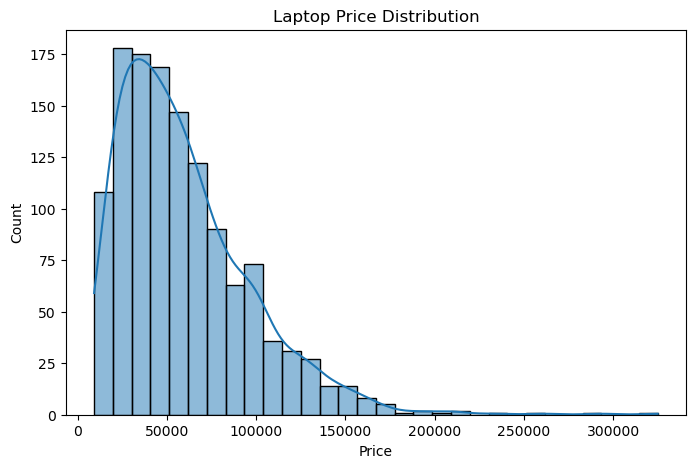

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["Price"], bins=30, kde=True)  
plt.title("Laptop Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


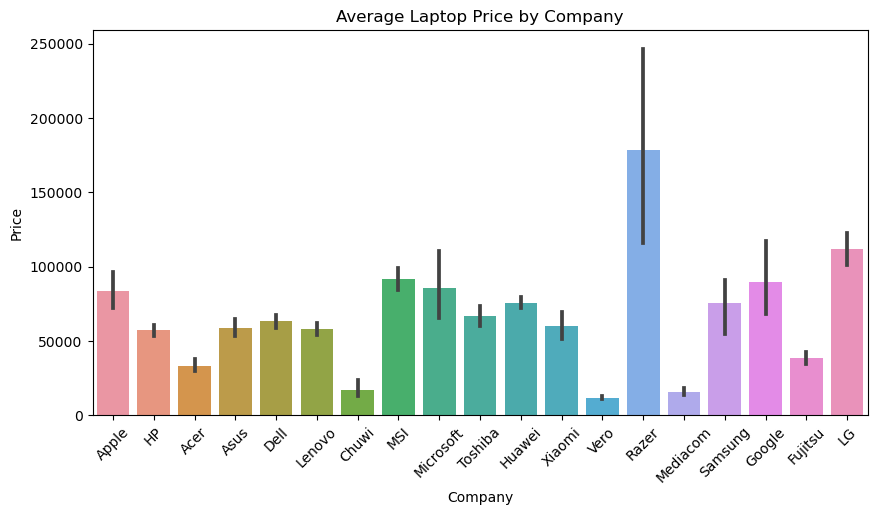

In [14]:
# Average Price by Company
plt.figure(figsize=(10,5))
sns.barplot(x="Company", y="Price", data=df)
plt.title("Average Laptop Price by Company")
plt.xticks(rotation=45)
plt.show()

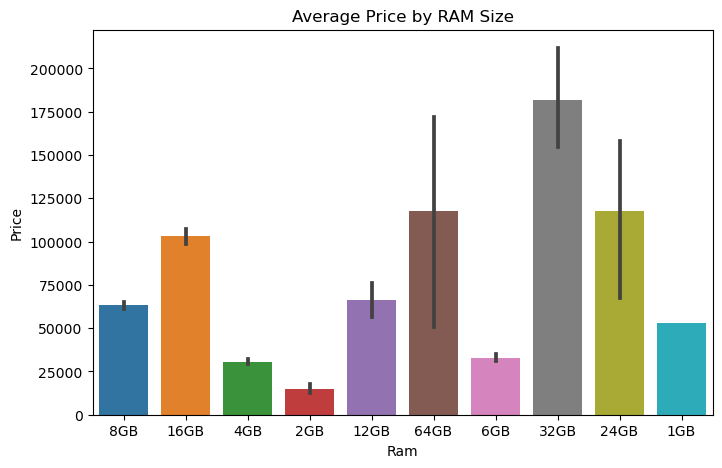

In [15]:
# RAM vs Price
plt.figure(figsize=(8,5))
sns.barplot(x="Ram", y="Price", data=df)
plt.title("Average Price by RAM Size")
plt.show()

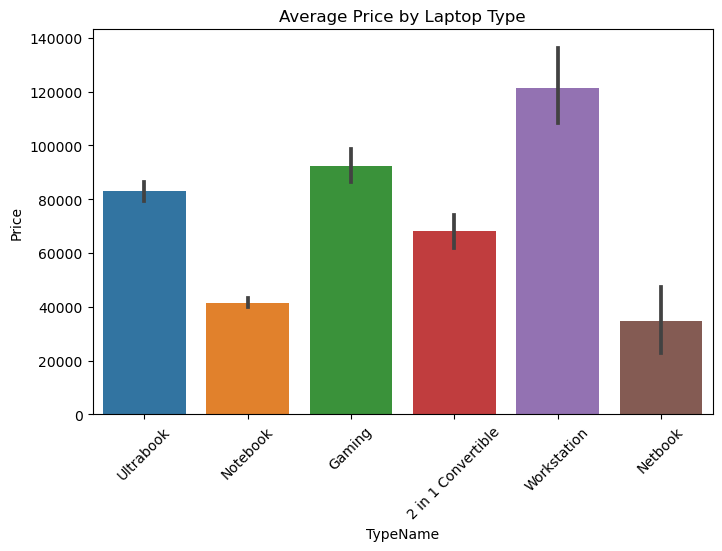

In [16]:
# Laptop Type vs Price
plt.figure(figsize=(8,5))
sns.barplot(x="TypeName", y="Price", data=df)
plt.title("Average Price by Laptop Type")
plt.xticks(rotation=45)
plt.show()

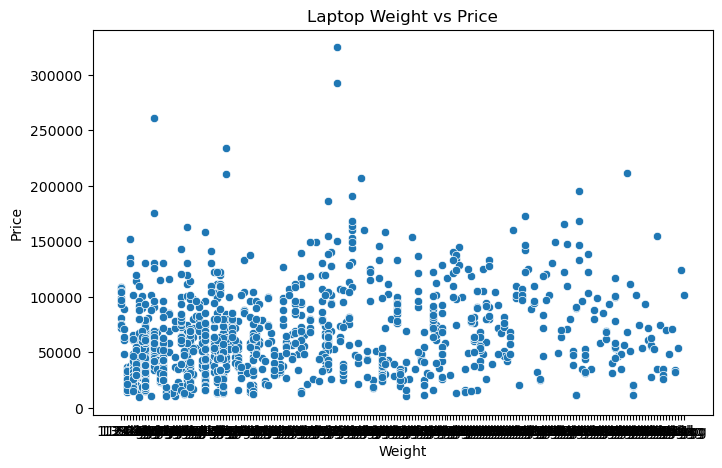

In [17]:
# Weight vs Price (scatter)
plt.figure(figsize=(8,5))
sns.scatterplot(x="Weight", y="Price", data=df)
plt.title("Laptop Weight vs Price")
plt.show()

<h2>Machine Learning Analysis<h2/>

In [23]:
df = pd.read_csv("E:/ds/DATA/laptopData.csv")
df = df.replace("?", np.nan)

# Drop useless column
df = df.drop(columns=["Unnamed: 0"])

# Drop rows with missing values (after replacing "?")
df = df.dropna()

# Clean numeric columns
df["Ram"] = df["Ram"].str.replace("GB", "").astype(int)
df["Weight"] = df["Weight"].str.replace("kg", "").astype(float)
df["Inches"] = df["Inches"].astype(float)

# Simplify CPU (take first 3 words)
df["Cpu"] = df["Cpu"].apply(lambda x: " ".join(x.split()[0:3]))

# Simplify GPU (take first 2 words)
df["Gpu"] = df["Gpu"].apply(lambda x: " ".join(x.split()[0:2]))

# Extract resolution (width & height separately)
df["Resolution"] = df["ScreenResolution"].str.extract(r"(\d+x\d+)")
df["X_res"] = df["Resolution"].str.split("x").str[0].astype(float)
df["Y_res"] = df["Resolution"].str.split("x").str[1].astype(float)
df = df.drop(columns=["ScreenResolution", "Resolution"])

# Handle Memory column
df["Memory"] = df["Memory"].str.replace("GB", "").str.replace("TB", "000")
df["Memory"] = df["Memory"].str.extract(r"(\d+)").fillna(0).astype(int)

# Encode categorical features
label_encoders = {}
for col in ["Company", "TypeName", "Cpu", "Gpu", "OpSys"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and Target
X = df.drop(columns=["Price"])
y = df["Price"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<h2>Linear Regression<h2/>

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lr = lin_reg.predict(X_test)

print("Linear Regression:")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
MAE: 14825.52983505347
R²: 0.5914497233105552


<h2>Decision Tree<h2/>

In [25]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print("Decision Tree:")
print("MAE:", mean_absolute_error(y_test, y_pred_dt))
print("R²:", r2_score(y_test, y_pred_dt))

Decision Tree:
MAE: 10978.514607874016
R²: 0.6666113274426073


<h2>Random Forest<h2/>

In [26]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))

Random Forest:
MAE: 8262.335527504203
R²: 0.8519665328272534


<h2>Gradient Boosting<h2/>

In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)

print("Gradient Boosting:")
print("MAE:", mean_absolute_error(y_test, y_pred_gb))
print("R²:", r2_score(y_test, y_pred_gb))


Gradient Boosting:
MAE: 9135.306202271611
R²: 0.8252948517432486


               Model           MAE          RMSE  R2 Score  Accuracy (%)
0  Linear Regression  14825.529835  21313.612835  0.591450     59.144972
1      Decision Tree  10978.514608  19253.502156  0.666611     66.661133
2      Random Forest   8262.335528  12829.634190  0.851967     85.196653
3  Gradient Boosting   9135.306202  13937.573464  0.825295     82.529485


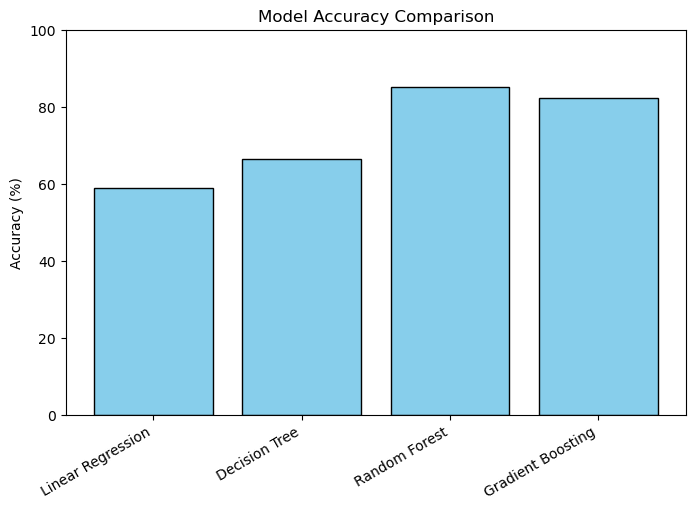

In [30]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42, n_estimators=100),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    accuracy = r2 * 100  # percentage form
    
    results.append([name, mae, rmse, r2, accuracy])

# Create results dataframe
results_df = pd.DataFrame(results, columns=["Model", "MAE", "RMSE", "R2 Score", "Accuracy (%)"])
print(results_df)

plt.figure(figsize=(8, 5))
plt.bar(results_df["Model"], results_df["Accuracy (%)"], color="skyblue", edgecolor="black")
plt.ylabel("Accuracy (%)")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30, ha="right")
plt.ylim(0, 100)  
plt.show()
